# Final Project

---

![alt text](hello.gif "Title")

## Shark Attacks

In this project, we used a Global Shark Attack datafile to explore trends and make analyses on shark attacks and their causes.
The data required a lot of cleaning to get to a usable state where we were able to make interesting visualizations and train a ML model to predict the fatality of attacks

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import requests
import time
from matplotlib import cm
import matplotlib.patches as mpatches
import seaborn as sns
import difflib
import dateparser
import folium
from IPython.display import Image
%matplotlib inline


shark_data=pd.read_csv("csv_archive/GSAF5.csv", encoding = "ISO-8859-1")
main_df=shark_data
shark_data.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2019.12.30,30-Dec-19,2019.0,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,male,M,...,"Shovelnose ""shark"" which is a ray, not a shark)","B. Myatt, GSAF",2019.12.30-Queensland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.30,2019.12.30,6492,NaN,NaN
1,2019.12.28,28-Dec-19,2019.0,Unprovoked,SEYCHELLES,Praslin,AmitiÃ© Beach,Swimming,female,F,...,NaN,Seychelles News Agency,2019.12.28-Seychelles.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.28,2019.12.28,6491,NaN,NaN
2,2019.12.26,26-Dec-19,2019.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surf skiing,Roger Swinney,M,...,NaN,"Times Live, 12/26/2019",2019.12.26-Swinney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.26,2019.12.26,6490,NaN,NaN
3,2019.12.21,21-Dec-19,2019.0,Unprovoked,USA,California,"Santa Rosa Island, Ventura County",Surfing,Adam Coons,M,...,NaN,"R. Collier, GSAF",2019.12.21-Coons.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.21,2019.12.21,6489,NaN,NaN
4,2019.12.20,20-Dec-19,2019.0,Provoked,AUSTRALIA,New South Wales,Shellharbour,Fishing,NaN,NaN,...,White shark,"B. Myatt, GSAF",2019.12.20-Shellharbour.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.12.20,2019.12.20,6488,NaN,NaN


## Cleaning up the data

The data requried cleaning and classifying both programatically and manually. There was minimal standardization for date format, country names, and even the fatality value. 

And the Activity field, which lists what activity the victim was doing prior to the attack was... well. Here are some examples of what we were working with:


* Attempting to lasso a shark

* Teasing a shark

* Attempting to Kite surf from Egypt to Saudi Arabia
* Murder
* Scuba diving in aquarium tank
* Diving. Shark “swallowed’ his hand, so he threw his other around the shark and went “shark-back riding” for 30 yards until the shark opened its jaws
* Testing anti-shark cage
* Escaping from Alacatraz
* Refused permission to cross on the ferry, he was swimming across the river
* Diving?


![alt text](laser.gif "Title")

In [27]:
# Selecting the columns & renaming columns names
col_to_keep = ["Date", "Year", "Type", "Country", "Activity", "Fatal (Y/N)"]
shark_data = shark_data[col_to_keep]
shark_data = shark_data.rename(columns={'Fatal (Y/N)': 'Fatal'})


#### Fatal/Non-Fatal Data
Cleaning Fatal/Non-Fatal Data to correct inconsistent fields

#### Countries and Hemispheres
Replacing and remapping countries and adding a hemisphere column for further classification

#### Activities before attack
Mapping the unstructured activity descriptions to the 6 most popular activites.

#### Attack Dates
Cleaning up date formats as well as parsing out Month and Year values for reporting and visualizations

In [28]:
shark_data["Fatal"] = shark_data["Fatal"].fillna("UNKNOWN")
#shark_data["Fatal"].value_counts()
shark_data.loc[shark_data["Fatal"] == " N", "Fatal"] = "N"
shark_data.loc[shark_data["Fatal"] == "n", "Fatal"] = "N"
shark_data.loc[shark_data["Fatal"] == "F", "Fatal"] = "Y"
shark_data.loc[shark_data["Fatal"] == "y", "Fatal"] = "Y"
shark_data.loc[shark_data["Fatal"] == "--M524--M3133Y", "Fatal"] = "UNKNOWN"
shark_data.loc[shark_data["Fatal"] == "Y x 2", "Fatal"] = "UNKNOWN"
shark_data.loc[shark_data["Fatal"] == "2017", "Fatal"] = "UNKNOWN"
shark_data.loc[shark_data["Fatal"] == "M", "Fatal"] = "UNKNOWN"
shark_data.loc[shark_data["Fatal"] == "N ", "Fatal"] = "N"
shark_data["Fatal"].value_counts()

N          4467
Y          1401
UNKNOWN     623
Name: Fatal, dtype: int64

In [29]:
#Cleaning Countires 
shark_data["Country"] = shark_data["Country"].fillna("UNKNOWN")
shark_data["Country"] = shark_data["Country"].fillna("UNKNOWN")
shark_data["Country"] = shark_data["Country"].str.rstrip()
shark_data["Country"] = shark_data["Country"].str.lstrip()
shark_data["Country"] = shark_data["Country"].str.replace("USA","United States")
shark_data["Country"] = shark_data["Country"].str.replace("ST. MAARTIN","SAINT MARTIN")
shark_data["Country"] = shark_data["Country"].str.replace("ST. MARTIN","SAINT MARTIN")
shark_data["Country"] = shark_data["Country"].str.replace("COLUMBIA","Colombia")
shark_data["Country"] = shark_data["Country"].str.replace("UNITED ARAB EMIRATES \(UAE\)","United Arab Emirates")
shark_data["Country"] = shark_data["Country"].str.replace("ENGLAND","United Kingdom")
shark_data["Country"] = shark_data["Country"].str.replace("SCOTLAND","United Kingdom")
shark_data["Country"] = shark_data["Country"].str.replace("(.*)\?","UNKNOWN")
shark_data["Country"] = shark_data["Country"].str.title()
shark_data["Country"] = shark_data["Country"].str.replace("Trinidad & Tobago","Trinidad and Tobago")
shark_data["Country"] = shark_data["Country"].str.replace("^(New Guinea)","Papua New Guinea")
shark_data["Country"] = shark_data["Country"].str.replace("New Britain","Papua New Guinea")
shark_data["Country"].value_counts().head()

United States       2326
Australia           1377
South Africa         585
Papua New Guinea     150
New Zealand          133
Name: Country, dtype: int64

In [30]:
#Hemispheres 
def get_hemisphere(country):
    southern_hemisphere = [
    "South Africa", "Reunion", "Mozambique", "Tanzania", "Mauritius", "Seychelles", 
    "Madagascar", "Namibia", "Mayotte", "Gabon", "Indonesia", "Brazil", "Ecuador", 
    "Argentina", "Chile", "Paraguay", "Uruguay", "Australia", "Papua New Guinea",
    "Fiji", "Papua New Guinea", "British New Guinea", "South Atlantic Ocean", "Indian Ocean", 
    "South Pacific Ocean", "Tasman Sea","Solomon Islands / Vanuatu"]
    if country in southern_hemisphere:
        return "S"
    if country == "Unknown":
        return np.nan
    else:
        return "N"

shark_data["Hemisphere"] = shark_data["Country"].apply(lambda x: get_hemisphere(x))

In [31]:
#Activities 
shark_data["Activity"].fillna("UNKNOWN")


def code_act(a):
    if isinstance(a, str):
        a = a.lower()
        if 'surfing' in a:
            return "Surfing"
        elif 'swimming' in a:
            return "Swimming"
        elif 'fishing' in a:
            return "Fishing"
        elif 'bathing' in a:
            return "Bathing"
        elif 'wading' in a:
            return "Wading"
        elif 'diving' in a:
            return "Diving"
        else:
            return "Other"
    else:
        return "Other"
shark_data["Activity"] = shark_data["Activity"].apply(lambda x: code_act(x))

In [32]:
shark_data.loc[364, "Year"] = 2017
shark_data.loc[6268,"Year"]=1836
shark_data["Year"] = shark_data["Year"].astype("int")
shark_data["Year"].dtype
shark_data = shark_data[shark_data["Year"] >= 1700]

#Cleaning Date Column 
shark = shark_data["Date"].astype("str")
shark_data["Date"] = shark_data["Date"].str.replace("Reported", "")
shark_data["Date"] = shark_data["Date"].str.replace("[rR]eport.*d", "")
shark_data["Date"] = shark_data["Date"].str.replace("\.b", "")
shark_data["Date"] = shark_data["Date"].str.replace("\.R", "")
shark_data["Date"] = shark_data["Date"].str.replace("\.", "-")
shark_data["Date"] = shark_data["Date"].str.replace("190Feb", "19-Feb")
shark_data["Date"] = shark_data["Date"].str.replace("Late ", "")
shark_data["Date"] = shark_data["Date"].str.replace("Early ", "-")
shark_data["Date"] = shark_data["Date"].str.replace("Mid.", "15-")
shark_data["Date"] = shark_data["Date"].str.replace("-Ap-", "-Apr-")
shark_data["Date"] = shark_data["Date"].str.replace("-Jut-", "-Jul-")
shark_data["Date"] = shark_data["Date"].str.replace("23-Decp1896", "23-Dec-1896")
shark_data["Date"] = shark_data["Date"].str.replace("Ca.", "")
shark_data["Date"] = shark_data["Date"].str.replace("Jan 1858", "Jan")
shark_data["Date"] = shark_data["Date"].str.replace("to Sep", "Sep")
shark_data["Date"] = shark_data["Date"].str.replace("March", "Mar")
shark_data["Date"] = shark_data["Date"].str.replace("April 1906", "Apr")
shark_data["Date"] = shark_data["Date"].str.replace("May 1871", "May")
shark_data["Date"] = shark_data["Date"].str.replace("Dec 1944", "Dec")
shark_data["Date"] = shark_data["Date"].str.replace("Jan 2011", "Jan")
shark_data["Date"] = shark_data["Date"].str.replace("1949 or Apr", "Apr")
shark_data["Date"] = shark_data["Date"].str.replace(" Jan", "Jan")
shark_data["Date"] = shark_data["Date"].str.replace("May 1927", "May")
shark_data["Date"] = shark_data["Date"].str.replace("Sept", "Sep")
shark_data["Date"] = shark_data["Date"].str.replace(" Sep", "Sep")

shark_data["Date"] = shark_data["Date"].str.lstrip()
shark_data["Date"] = shark_data["Date"].str.rstrip()

shark_data = shark_data[shark_data["Date"].notnull()]


shark_data=pd.concat([shark_data.drop('Date', axis = 1), 
          (shark_data.Date.str.split("-|T").str[:3].apply(pd.Series)
          .rename(columns={0:'Day', 1:'Month', 2:'Abbrv_year'}))], axis = 1)
shark_data.head(2)


shark_data = shark_data[shark_data["Month"].notnull()]

In [33]:
def get_month(month):
    m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if month in m:
        return month
    else:
        return "other"

shark_data["Months"] = shark_data["Month"].apply(lambda x: get_month(x))
#shark_data["Months"].unique()

shark_data = shark_data[shark_data["Month"].notnull()]

In [34]:
shark_data.head(10)

,Year,Type,Country,Activity,Fatal,Hemisphere,Day,Month,Abbrv_year,Months
0,2019,Unprovoked,Australia,Swimming,N,S,30,Dec,19,Dec
1,2019,Unprovoked,Seychelles,Swimming,N,S,28,Dec,19,Dec
2,2019,Unprovoked,South Africa,Other,N,S,26,Dec,19,Dec
3,2019,Unprovoked,United States,Surfing,N,N,21,Dec,19,Dec
4,2019,Provoked,Australia,Fishing,UNKNOWN,S,20,Dec,19,Dec


### Shark Types
Creating a new dataset for visualizations that has the top 10 shark species with fatal attacks.

In [35]:
sharklist = main_df['Species ']
sharklist = sharklist.dropna(how='any').drop_duplicates().reset_index().drop('index', axis = 1)
input_string = [x for x in sharklist['Species '] if ('shark' or 'sharks') in x.lower().split()]
shark_species = [x.split()[(x.lower().split().index('shark'))-1].lower() + ' shark' for x in sharklist['Species '] if ('shark' or 'sharks') in x.lower().split()]
values = [input_string, shark_species]
headers = ['Species ','Shark_Type']
shark_type_df = pd.DataFrame(dict(zip(headers,values)))
sharktypemaindf = pd.merge(main_df, shark_type_df, on = 'Species ')
fatalcount = sharktypemaindf[['Shark_Type', 'Fatal (Y/N)']]
countlist = fatalcount['Shark_Type'].value_counts()
sharkcount = pd.DataFrame(countlist).reset_index()
sharkcount = sharkcount.rename(columns = {'index':'Shark_Type','Shark_Type':'Total Count'})
df= pd.DataFrame(fatalcount.groupby('Shark_Type')['Fatal (Y/N)'].apply(lambda x: (x=='Y').sum()).reset_index(name='Fatal_Count'))
total_fatal = pd.merge(sharkcount,df,on = 'Shark_Type', how = 'left')

output = total_fatal.iloc[[0,3,4,9,10,12,13,17,19,26]]
output.to_csv("shark_type.csv")

### Locations

Using the Google Geocoding API, we mapped the locations given to actual coordinates.

GET_COORDINATES NOTEBOOK

## Visualizations

### Shark Attack Locations

In [36]:
df2 = pd.read_csv('active_csv/sharkloc.csv')
import plotly.express as px
fig = px.density_mapbox(df2, lat='latitude', lon='longitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [69]:
heat = Image(filename='heatmap.PNG') 

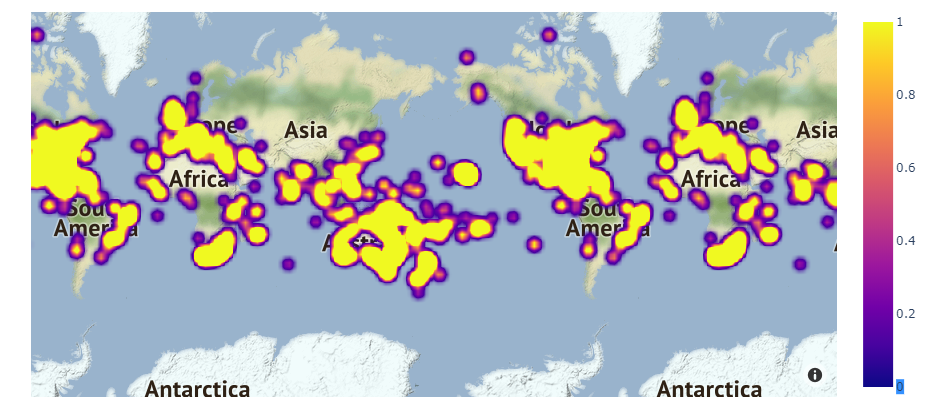

In [70]:
heat

In [38]:
from folium.plugins import HeatMapWithTime
maindf = pd.read_csv('active_csv/maindf_w_coordinates.csv', low_memory = False)
def generateBaseMap(default_location=[40.5397293,-74.6273494], default_zoom_start=12):    
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)    
    return base_map
df3 = []
for date in maindf.Year.sort_values().unique():
    df3.append(maindf.loc[maindf.Year == date, ['latitude', 'longitude', 'Year']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())
base_map = generateBaseMap(default_zoom_start=2)

HeatMapWithTime(df3, radius=10, gradient={0.2: 'purple', 0.4: 'lime', 0.6: 'orange', 1: 'yellow'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)

folium.TileLayer('cartodbdark_matter').add_to(base_map)



In [39]:
base_map

[Text(0, 0.5, ''), Text(0.5, 0, 'Month')]

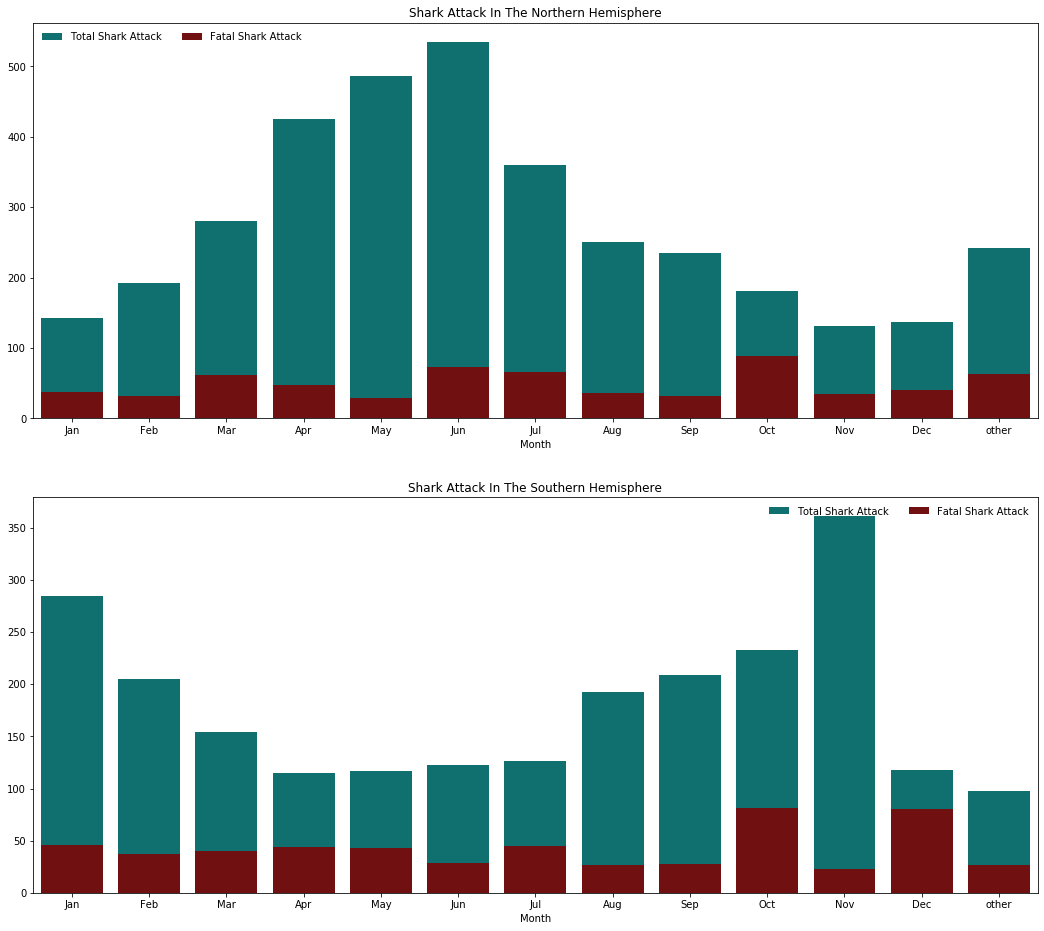

In [40]:
#Attacks by month, northern vs southern hemisphere 
fig = plt.figure(figsize=(18, 16))
ax1 = plt.subplot(211)
plt.title("Shark Attack In The Northern Hemisphere")
ax2 = plt.subplot(212)
plt.title("Shark Attack In The Southern Hemisphere")


p = sns.countplot(x="Months", data=shark_data[shark_data["Hemisphere"] == "N"], label="Total Shark Attack", color="teal", ax=ax1)
g = sns.countplot(x="Months", data=shark_data[(shark_data["Hemisphere"] == "N") & (shark_data["Fatal"] == "Y")], 
                  label="Fatal Shark Attack", color="maroon", ax=ax1)

v = sns.countplot(x="Months", data=shark_data[shark_data["Hemisphere"] == "S"], label="Total Shark Attack", color="teal", ax=ax2)
d = sns.countplot(x="Months", data=shark_data[(shark_data["Hemisphere"] == "S") & (shark_data["Fatal"] == "Y")], 
                  label="Fatal Shark Attack", color="maroon", ax=ax2)

m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','other']


ax1.legend(ncol=2, loc="upper left", frameon=False)
ax2.legend(ncol=2, loc="upper right", frameon=False)
p.set_xticklabels(m)
v.set_xticklabels(m)
ax1.set(ylabel="", xlabel="Month")
ax2.set(ylabel="", xlabel="Month")

<img src="hems.png" alt="Drawing" style="height: 600px;"/>

[Text(0, 0.5, ''), Text(0.5, 0, 'Year')]

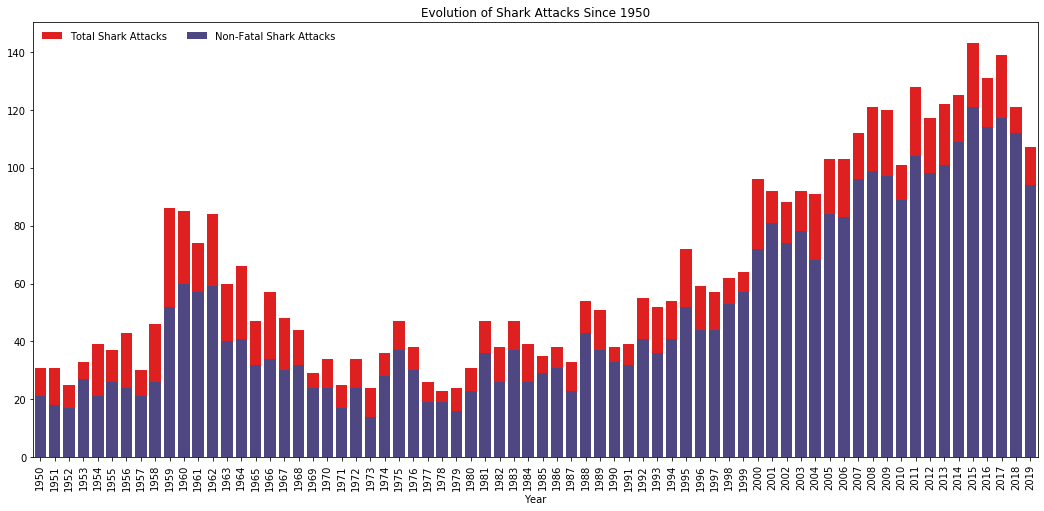

In [42]:
# Shark attacks since 1950 
fig, ax = plt.subplots(figsize=(18, 8))
plt.title("Evolution of Shark Attacks Since 1950")
p = sns.countplot(x="Year", data=shark_data[shark_data["Year"] >= 1950], label="Total Shark Attacks", color="r")
g = sns.countplot(x="Year", data=shark_data[(shark_data["Year"] >= 1950) & (shark_data["Fatal"] == "N")], 
                  label="Non-Fatal Shark Attacks", color="darkslateblue")
ax.legend(ncol=2, loc="upper left", frameon=False)
p.set_xticklabels(p.get_xticklabels(), rotation=90)
ax.set(ylabel="", xlabel="Year")

[Text(0, 0.5, ''), Text(0.5, 0, '')]

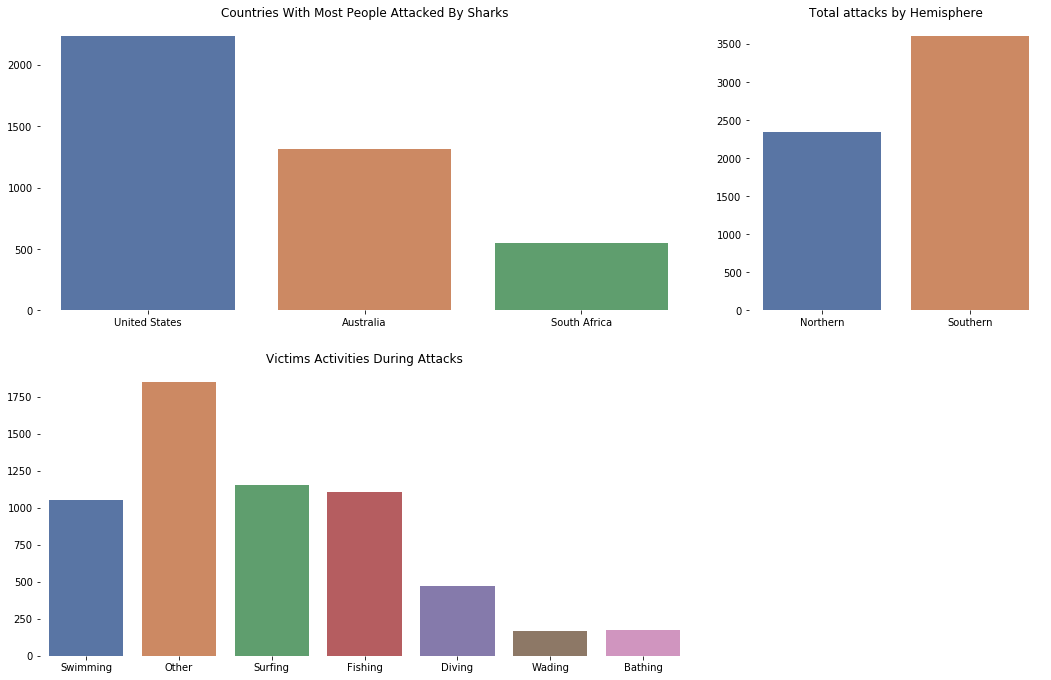

In [43]:

fig = plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=2)
plt.title('Countries With Most People Attacked By Sharks')
ax2 = plt.subplot2grid((3,3), (0,2))
plt.title('Total attacks by Hemisphere')
ax3 = plt.subplot2grid((3,3), (1,0), colspan=2)
plt.title('Victims Activities During Attacks')


g1 = sns.countplot(x="Country", data=shark_data, palette="deep", order=shark_data.Country.value_counts().iloc[:3].index, ax=ax1)
g2 = sns.countplot(x="Hemisphere", data=shark_data, palette="deep", ax=ax2)
g3 = sns.countplot(x="Activity", data=shark_data, palette="deep", ax=ax3)


sns.despine(left=True, bottom=True)
ax1.set(ylabel="", xlabel="")
ax2.set(ylabel="", xlabel="")
ax2.set_xticklabels(["Northern", "Southern"])
ax3.set(ylabel="", xlabel="")

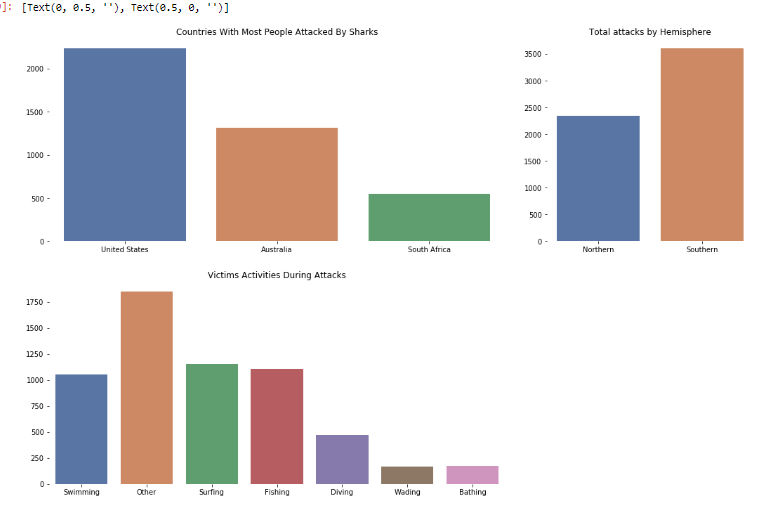

In [44]:
Image(filename='bars.PNG') 

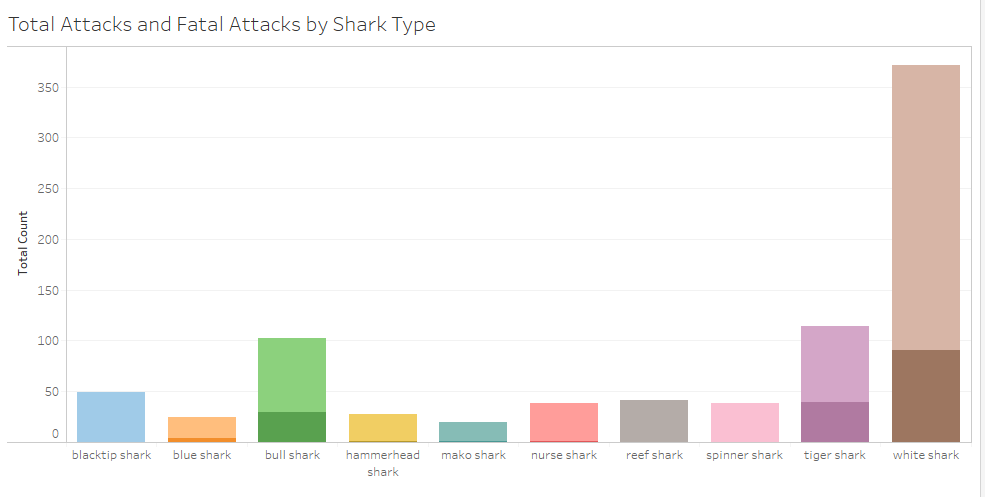

In [45]:
Image(filename='Total_Attacks.PNG') 

## Predicting Fatality
Training a machine learning algorithm to predict if an attack is fatal.

In [46]:
shark_data.head(1)

,Year,Type,Country,Activity,Fatal,Hemisphere,Day,Month,Abbrv_year,Months
0,2019,Unprovoked,Australia,Swimming,N,S,30,Dec,19,Dec


In [63]:
shark_data["Fatal"].value_counts(normalize = True)
df = shark_data[shark_data.Fatal != "UNKNOWN"]
df["Fatal"] = df["Fatal"].str.contains("Y")

C:\Users\Christina\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [65]:
df["Fatal"].value_counts(normalize = True)

False    0.776445
True     0.223555
Name: Fatal, dtype: float64

In [49]:
df.isnull().sum()

Year            0
Type            3
Country         0
Activity        0
Fatal           0
Hemisphere     36
Day             0
Month           0
Abbrv_year    320
Months          0
dtype: int64

In [50]:
df = df.drop(["Day","Year","Abbrv_year","Months"],axis =1)

In [51]:
df = df.fillna(method = "ffill")
df.isnull().sum()

Type          0
Country       0
Activity      0
Fatal         0
Hemisphere    0
Month         0
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
# get train set and test set
train,test = train_test_split(df,train_size = .5,test_size = .5,random_state = 42)

# get train set and validation set
train,val = train_test_split(train,train_size = .8,test_size = .2,random_state = 42)

target = "Fatal"
X_train = train.drop(target,axis = 1)
y_train = train[target]
X_val = val.drop(target,axis = 1)
y_val = val[target]
X_test = test.drop(target,axis = 1)
y_test = test[target]


X_train.head()

,Type,Country,Activity,Hemisphere,Month
991,Unprovoked,United States,Surfing,N,Mar
22,Unprovoked,United States,Surfing,N,Oct
3185,Provoked,South Africa,Other,S,Oct
3104,Unprovoked,United States,Swimming,N,Aug
3723,Provoked,Australia,Other,S,Jan


In [53]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
from sklearn.metrics import classification_report

In [54]:
pipe = make_pipeline(ce.OrdinalEncoder(),
                     SimpleImputer(strategy = "mean"), # dont really need this but adding it anyway
                     RandomForestClassifier(n_estimators=1000, n_jobs = -1,random_state=42))
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Type', 'Country', 'Activity',
                                      'Hemisphere', 'Month'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Type',
                                          'data_type': dtype('O'),
                                          'mapping': Unprovoked             1
Provoked               2
Watercraft             3
Sea Disaster           4
Invalid                5
Questionable           6
Boat                   7
Under investigation    8
NaN                   -2
dtype: int64},
                                         {'co...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
  

In [55]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.7652270210409745

In [56]:
from sklearn.metrics import roc_auc_score
y_pred_prob = pipe.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred_prob)

0.7396823605186802

In [57]:
confusion_matrix(y_test,y_pred)

array([[1857,  251],
       [ 385,  216]], dtype=int64)

In [58]:
def plotCM(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return table

In [59]:
plotCM(y_test,y_pred)

,Predicted False,Predicted True
Actual False,1857,251
Actual True,385,216


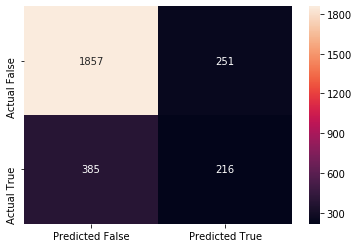

In [60]:
sns.heatmap(plotCM(y_test,y_pred),annot = True,fmt = "d");

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.83      0.88      0.85      2108
        True       0.46      0.36      0.40       601

    accuracy                           0.77      2709
   macro avg       0.65      0.62      0.63      2709
weighted avg       0.75      0.77      0.75      2709



# Questions?
---
![alt text](test.gif "Title")